# Gerar arquivos npz 3D a partir do nifti 
* Para o treinamento do modelo, os dados foram convertidos para arquivos no formato npz, por exigir menos custo computacional em relação o nifti. Isso acontece por que as informações do cabeçalho não são salvas no arquivo npz neste trabalho e uma vez que os dados estejam corretos e alinhados é mais vantajoso usar os dados em npz durante o treinamento. Nesta implementação, apenas um arquivo npz é salvo para cada sujeito composto pela máscara (mask) e imagem (data) compactado.

In [2]:
import os
import numpy as np
import glob
import nibabel as nib
import argparse 

def get_npz_3D(data_paths):
    #print(data_paths)
    for data_path in data_paths:
        #print(data_path)
        patient_id = os.path.basename(data_path)
        label_file = 'iso_brainmask_T1w.nii.gz'
        T1_file = 'iso_brain_T1w.nii.gz'
        img_T1 = nib.load(os.path.join(data_path, T1_file))
        img_data_T1 = img_T1.get_fdata()
        img_T1 = img_data_T1
        
        label = nib.load(os.path.join(data_path, label_file))
        label_data = label.get_fdata()
        mask = label_data
        print(f'imagem: sujeito -> {patient_id}, shape -> {img_T1.shape} , máximo -> {img_T1.max()}, mínimo -> {img_T1.min()},' )
        print(f'máscara: sujeito -> {patient_id}, shape -> {mask.shape} , máximo -> {mask.max()}, mínimo -> {mask.min()},' )
        out_name = patient_id + '.npz'
        np.savez_compressed(os.path.join(data_path, out_name), data=img_T1, mask=mask)
        #print(label_data.max())
        #print(label_data.min())
    return img_data_T1, label_data

folder_mri = f"/home/joany/dataset_train/train"
data_paths = glob.glob(os.path.join(folder_mri, "*"))

image, label = get_npz_3D(data_paths)


imagem: sujeito -> CC0018, shape -> (150, 256, 256) , máximo -> 2751.399169921875, mínimo -> -203.94349670410156,
máscara: sujeito -> CC0018, shape -> (150, 256, 256) , máximo -> 1.0, mínimo -> 3.8039840206787414e-18,
imagem: sujeito -> CC0241, shape -> (256, 196, 256) , máximo -> 5776.0, mínimo -> 0.0,
máscara: sujeito -> CC0241, shape -> (256, 196, 256) , máximo -> 1.0, mínimo -> 5.21892303136616e-14,
imagem: sujeito -> CC0098, shape -> (180, 240, 240) , máximo -> 3850.281982421875, mínimo -> -2.2075899864647947e-13,
máscara: sujeito -> CC0098, shape -> (180, 240, 240) , máximo -> 1.0, mínimo -> 1.6493697033159727e-11,
imagem: sujeito -> CC0022, shape -> (179, 256, 256) , máximo -> 2955.383544921875, mínimo -> -117.2503433227539,
máscara: sujeito -> CC0022, shape -> (179, 256, 256) , máximo -> 1.0, mínimo -> 0.0,
imagem: sujeito -> A00038642, shape -> (256, 256, 192) , máximo -> 1310.0, mínimo -> 0.0,
máscara: sujeito -> A00038642, shape -> (256, 256, 192) , máximo -> 1.0, mínimo -> 

# Visualização dos dados em npz:
* A cédula abaixo apenas mostra os dados npz para um sujeito de um conjunto de dados. O objetivo disso é conferir se os dados que serão usados no treinamento esta alinhado com a imagem. A linha 1 mostra as imagens, a linha 2 mostra a máscara e a linha 3 a sobreposição entre a máscara e a imagem, nos três cortes.  

(171, 256, 256)


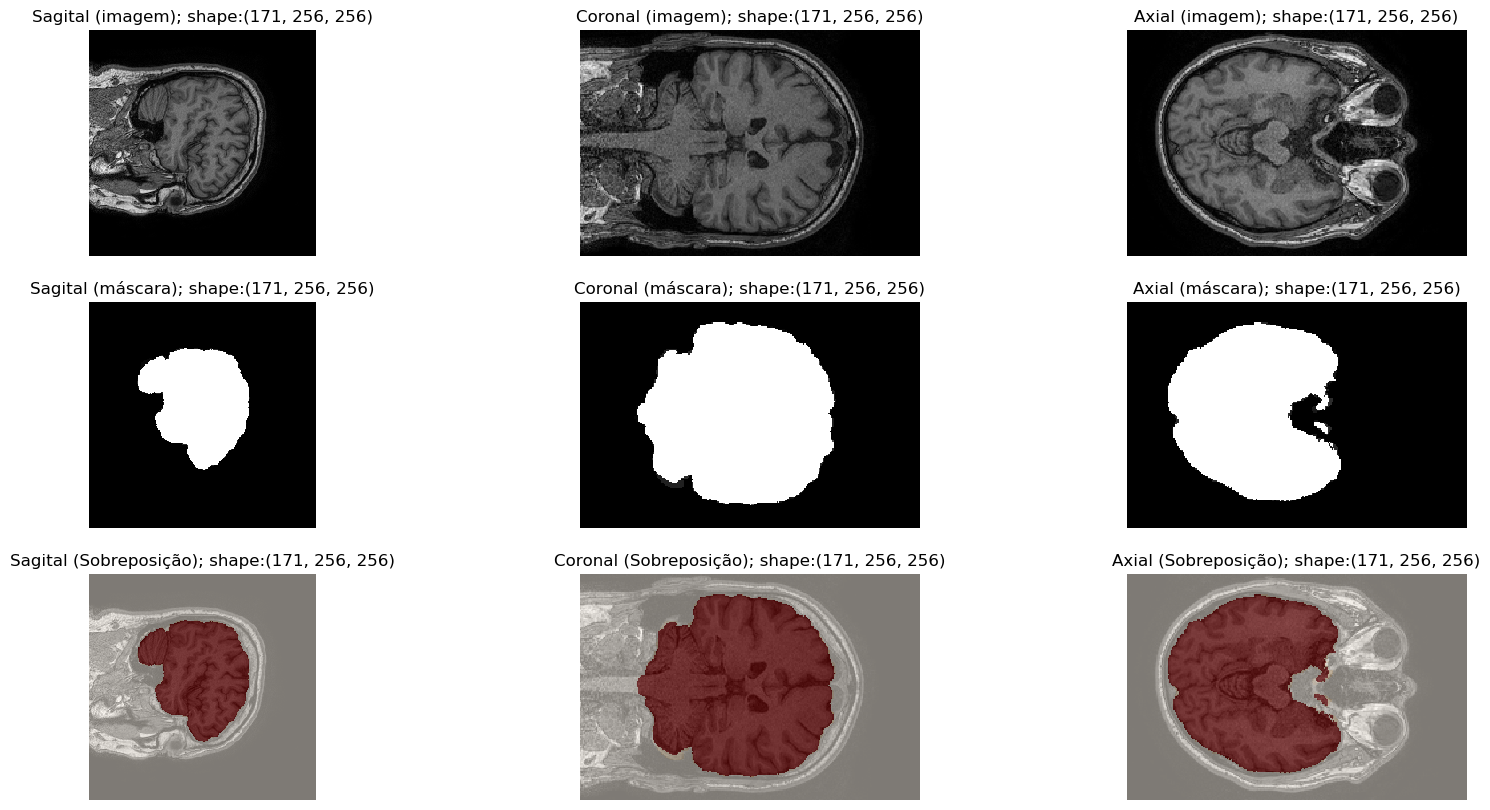

In [41]:
# vizualisação 3D
import numpy as np
import matplotlib.pyplot as plt
arq_npz = np.load("/home/joany/CC0001/CC0001.npz")
#arq_npz1 = np.load("/home/joany/dataset_train/train/CC0001/CC0001.npz.npz")
image = arq_npz['data']
#image1 = np.rot90(image, k=1, axes=(1, -1))
#image2 = np.rot90(image, k=1, axes=(0, -1))
#image3 = np.rot90(image, k=1, axes=(1, 0))
#image = np.transpose(image, (1, 0, 2))
mask = arq_npz['mask']
image.shape

plt.figure("Check", (20, 10))
plt.subplot(3, 3, 1)
plt.title(f"Sagital (imagem); shape:{image.shape}")
plt.axis('off')
plt.imshow(image[128,:,:], cmap = 'gray')
plt.subplot(3, 3, 2)
plt.title(f"Coronal (imagem); shape:{image.shape}")
plt.axis('off')
plt.imshow(image[:,100,:], cmap = 'gray')
plt.subplot(3, 3, 3)
plt.title(f"Axial (imagem); shape:{image.shape}")
plt.axis('off')
plt.imshow(image[:,:,100], cmap = 'gray')
plt.subplot(3, 3, 4)
plt.title(f"Sagital (máscara); shape:{mask.shape}")
plt.axis('off')
plt.imshow(mask[128,:,:], cmap = 'gray')
plt.subplot(3, 3, 5)
plt.title(f"Coronal (máscara); shape:{mask.shape}")
plt.axis('off')
plt.imshow(mask[:,100,:], cmap = 'gray')
plt.subplot(3, 3, 6)
plt.title(f"Axial (máscara); shape:{mask.shape}")
plt.axis('off')
plt.imshow(mask[:,:,100], cmap = 'gray')
plt.subplot(3, 3, 7)
plt.title(f"Sagital (Sobreposição); shape:{mask.shape}")
plt.axis('off')
plt.imshow(image[128, :, :], cmap='gray')
plt.imshow(mask[128, :, :], alpha=0.5, cmap='OrRd')
plt.subplot(3, 3, 8)
plt.title(f"Coronal (Sobreposição); shape:{mask.shape}")
plt.axis('off')
plt.imshow(image[:, 100, :], cmap='gray')
plt.imshow(mask[:, 100, :], alpha=0.5, cmap='OrRd')
plt.subplot(3, 3, 9)
plt.title(f"Axial (Sobreposição); shape:{mask.shape}")
plt.axis('off')
plt.imshow(image[:, :, 100], cmap='gray')
plt.imshow(mask[:, :, 100], alpha=0.5, cmap='OrRd')
print(image.shape)
#(2, 112, 137, 107)

## Mover o npz para outra pastas para realização do treinamento. 
* Depois de gerar os npzs na mesma pasta que estão o nifti de cada sujeito, eles são movidos para uma pasta nomeada com o nome do pré-processamento que foi aplicado, por exemplo, dataset_voxels_interpolation. Indica que houve o pré-processamento de interpolação de voxel.

In [2]:
import os
import glob
import shutil
import os
import numpy as np
file_paths = list(glob.iglob("/home/joany/dataset_train/train/*/*.npz", recursive=True)) 
for data_path in file_paths:
    patient_id = os.path.dirname(data_path)
    patient_id = patient_id.split('/')[-1]
    print(patient_id)
    
    os.makedirs("/home/joany/dataset_train/dataset_voxels_interpolation/train/" + patient_id, exist_ok=True)
    try:
        shutil.move(data_path, "/home/joany/dataset_train/dataset_voxels_interpolation/train/" + patient_id)
    except:
        continue

CC0018
CC0241
CC0098
CC0022
A00038642
CC0071
CC0323
A00057444
CC0113
A00043520
CC0264
A00053475
CC0320
CC0344
CC0016
CC0289
CC0156
CC0297
CC0273
CC0036
A00057005
S12
A00037511
CC0151
A00057965
CC0130
CC0197
A00040573
CC0358
CC0216
S40
A00053851
CC0329
CC0210
A00039391
A00040524
CC0255
CC0233
CC0236
CC0118
CC0314
CC0100
S20
CC0102
S38
CC0338
CC0234
CC0307
CC0024
CC0086
CC0260
A00053850
CC0272
CC0254
CC0325
A00039431
CC0154
CC0215
S28
CC0021
CC0063
CC0303
S03
A00051539
CC0054
CC0326
CC0188
CC0033
CC0128
CC0168
S39
CC0132
CC0091
CC0114
CC0055
CC0230
CC0111
A00057372
CC0089
A00043704
A00028352
CC0008
A00056452
CC0279
A00056627
CC0287
CC0014
A00055446
S15
CC0322
A00054441
CC0164
A00054857
CC0343
CC0074
S37
A00053473
CC0027
A00045590
CC0067
A00055121
CC0105
CC0321
CC0221
CC0266
CC0146
CC0196
CC0353
A00056556
CC0041
A00038998
A00035827
CC0200
CC0247
CC0064
CC0182
CC0217
A00055763
CC0355
CC0239
CC0110
CC0106
CC0046
CC0043
A00058552
CC0199
CC0097
A00051548
CC0056
A00058214
A00043677
A00059344
C

# obter o 2D a partir do 3D npz
* Sugestão para gerar o 2D a partir do 3D.

In [ ]:
def read_file(data_paths): 
    for data_path in data_paths:
        patient_id = os.path.basename(data_path)
        FA_file = patient_id + '.npz'
        print(data_path)
        arq_npz = np.load(os.path.join(data_path, FA_file))
        image = arq_npz['data']
        mask = arq_npz['mask']
        shape = image.shape
        nslices = image.shape[0]
        for n in range(nslices):
            save_path = os.path.join(data_path, f"slice{n}_DD.npz")  
            np.savez_compressed(save_path, data=image[n, :, :], mask = mask[n, :, :])
    return image, mask